# 🔄 Stochastic Oscillator

This notebook demonstrates how to compute and visualize the **Stochastic Oscillator**, a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ticker = "AAPL"
stock = yf.Ticker(ticker)
df = stock.history(period="6mo")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-17 00:00:00-04:00,197.199997,198.830002,194.419998,196.979996,51334300,0.0,0.0
2025-04-21 00:00:00-04:00,193.270004,193.800003,189.809998,193.160004,46742500,0.0,0.0
2025-04-22 00:00:00-04:00,196.119995,201.589996,195.970001,199.740005,52976400,0.0,0.0
2025-04-23 00:00:00-04:00,206.000000,208.000000,202.800003,204.600006,52929200,0.0,0.0
2025-04-24 00:00:00-04:00,204.884995,208.829895,202.940002,208.369995,46781254,0.0,0.0


## 🧮 Calculate %K and %D

The formula for %K:
`%K = 100 * (Close - Lowest Low) / (Highest High - Lowest Low)`

And %D is a simple moving average of %K over 3 periods.

In [3]:
low_min = df['Low'].rolling(window=14).min()
high_max = df['High'].rolling(window=14).max()
df['%K'] = 100 * (df['Close'] - low_min) / (high_max - low_min)
df['%D'] = df['%K'].rolling(window=3).mean()
df[['Close', '%K', '%D']].tail()

,Close,%K,%D
Date,,,
2025-04-17 00:00:00-04:00,196.979996,49.228851,50.676592
2025-04-21 00:00:00-04:00,193.160004,42.783135,45.478913
2025-04-22 00:00:00-04:00,199.740005,54.537337,48.849774
2025-04-23 00:00:00-04:00,204.600006,80.928431,59.416301
2025-04-24 00:00:00-04:00,208.369995,89.549491,75.005086


## 📊 Plot Stochastic Oscillator

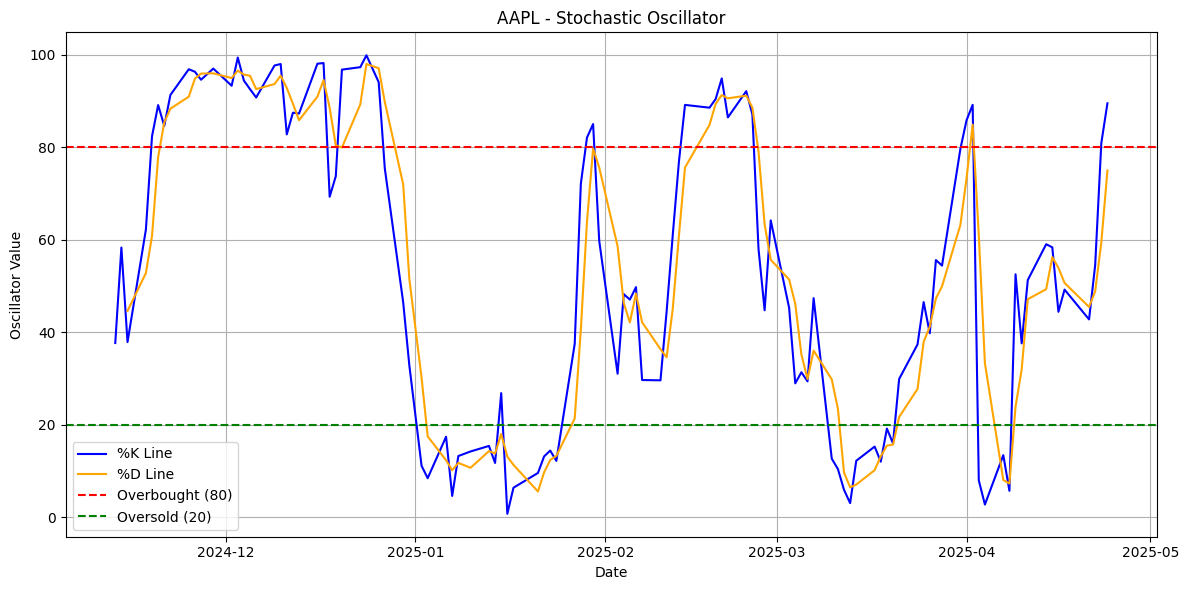

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['%K'], label='%K Line', color='blue')
plt.plot(df.index, df['%D'], label='%D Line', color='orange')
plt.axhline(80, color='red', linestyle='--', label='Overbought (80)')
plt.axhline(20, color='green', linestyle='--', label='Oversold (20)')
plt.title(f'{ticker} - Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Oscillator Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 📌 Interpretation
- Values above 80 suggest the asset is overbought.
- Values below 20 suggest it is oversold.
- Crossovers between %K and %D may signal trend reversals.